In [7]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [43]:
df = pd.read_csv('roles_alldf_prepro_data.csv')
df

,user_id,self_character,spike_planted,spike_time,round_info_round_end,round_info_round_won,round_info_round_start,ally3_pre_spike_elims,ally3_post_spike_elims,ally3_pre_spike_deaths,...,self_pre_spike_longest_gun_primary_judge,self_pre_spike_longest_gun_primary_marshal,self_pre_spike_longest_gun_primary_none,self_pre_spike_longest_gun_primary_odin,self_pre_spike_longest_gun_primary_operator,self_pre_spike_longest_gun_primary_phantom,self_pre_spike_longest_gun_primary_spectre,self_pre_spike_longest_gun_primary_stinger,self_pre_spike_longest_gun_primary_vandal,round_info_round_length
0,3807,2,0,0,178579,0,134795,0,0,1,...,0,0,1,0,0,0,0,0,0,43784
1,3807,2,1,257180,287772,0,208579,0,0,1,...,0,0,1,0,0,0,0,0,0,79193
2,3807,2,0,0,377967,1,317772,0,0,0,...,0,0,0,0,0,0,0,0,1,60195
3,3807,2,1,471764,487358,0,407967,0,2,0,...,0,0,0,0,0,0,0,0,1,79391
4,3807,2,1,540359,580547,0,517358,0,0,1,...,0,0,1,0,0,0,0,0,0,63189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28954,1018,0,1,1340413,1375064,1,1313681,0,0,0,...,0,0,1,0,0,0,0,0,0,61383
28955,1018,0,0,0,1439659,1,1405064,1,0,1,...,0,0,0,0,0,0,0,0,1,34595
28956,1018,0,0,0,1504595,1,1469659,2,0,1,...,0,0,1,0,0,0,0,0,0,34936
28957,1018,0,1,1562583,1600300,1,1534595,0,0,2,...,0,0,0,0,0,0,0,0,1,65705


In [92]:
unique_values = df['user_id'].value_counts()
unique_values[:50]

3806    3727
69      3218
3804    2195
3808    1642
3807    1582
1013    1271
1012    1110
63      1085
1010     952
77       828
1011     605
62       446
999      442
997      436
71       422
1009     419
58       361
1564     336
1016     303
82       297
56       291
1001     288
53       280
52       278
1007     265
57       259
68       252
1014     250
1017     238
73       222
65       220
55       217
80       214
54       212
1005     198
3795     198
60       196
64       191
74       190
78       174
59       169
67       168
3805     167
81       151
61       147
3799     146
72       142
66       129
996      127
3803     126
Name: user_id, dtype: int64

In [81]:
filter_values = [3806,69,3804,3808,3807,1013,1012,63,1010,77,1011]

filtered_df = df[df['user_id'].isin(filter_values)]
filtered_df.shape

(18215, 522)

In [82]:
y = filtered_df['self_character']
y

0        2
1        2
2        2
3        2
4        2
        ..
28917    1
28918    1
28919    1
28920    1
28921    1
Name: self_character, Length: 18215, dtype: int64

In [83]:
X = filtered_df.values[:10000]
X.shape

y = y[:10000]

In [ ]:
y = filtered_df['self_character']
y

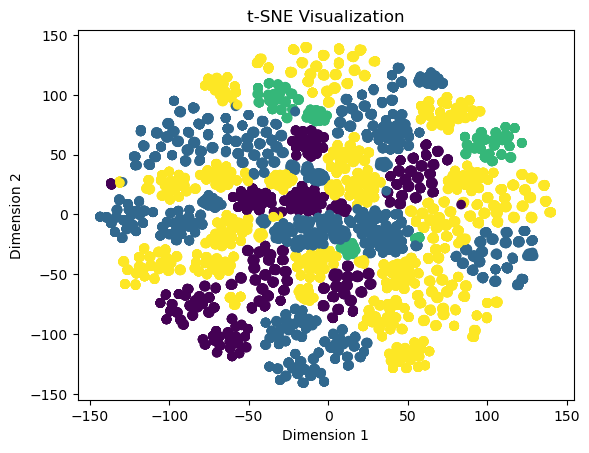

In [85]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=20).fit_transform(X)
X_embedded.shape

# Scatter plot
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('t-SNE Visualization')
plt.show()

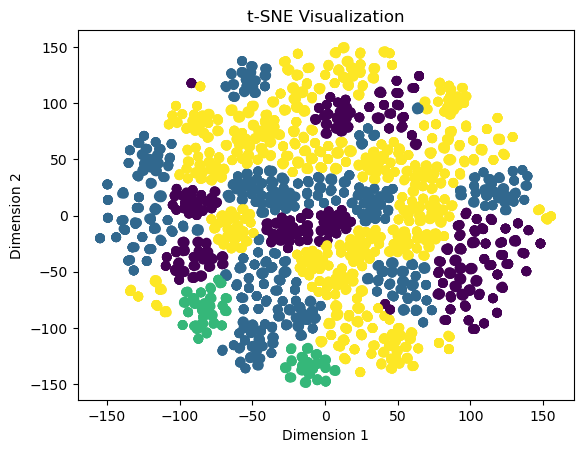

In [77]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=10).fit_transform(X)
X_embedded.shape

# Scatter plot
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('t-SNE Visualization')
plt.show()

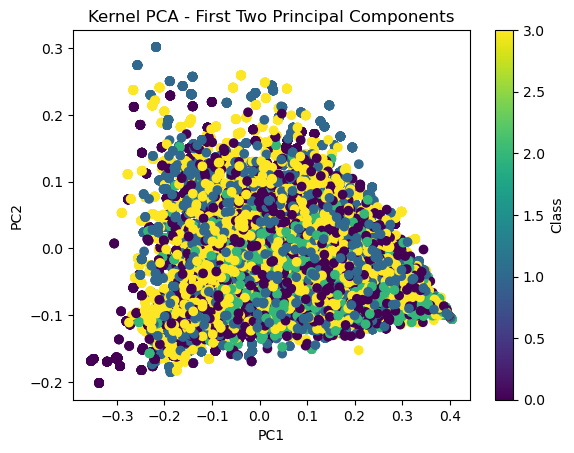

In [53]:
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt

# Assuming X is your input data

# Perform Kernel PCA
kpca = KernelPCA(n_components=2, kernel='rbf')
X_kpca = kpca.fit_transform(X)

# Visualize the first two principal components with color
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Kernel PCA - First Two Principal Components')
plt.colorbar(label='Class')
plt.show()

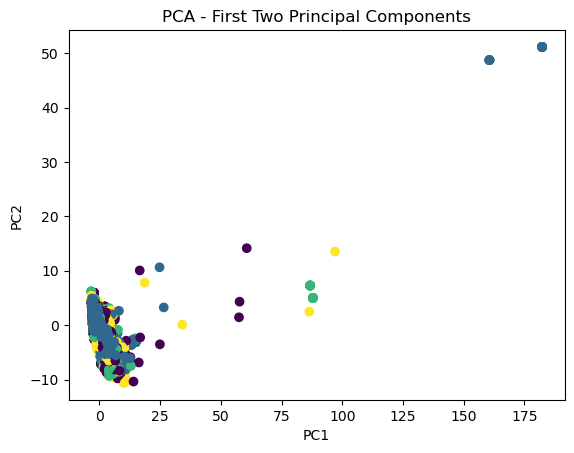

In [54]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming X is your input data

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualize the first two principal components
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA - First Two Principal Components')
plt.show()